In [5]:
from nvidia.dali.pipeline import Pipeline
import nvidia.dali.ops as ops            
import nvidia.dali.types as types

batch_size = 1
image_filename = "images"

In [6]:
class HsvPipeline(Pipeline):                   
    def __init__(self, batch_size, num_threads, device_id):
        super(HsvPipeline, self).__init__(batch_size, num_threads, device_id, seed=12)
        self.input = ops.FileReader(device="cpu",file_root=image_filename)
        self.decode = ops.ImageDecoder(device = "cpu", output_type = types.RGB)
        self.hsv = ops.Hsv(device = "cpu", hue_delta = 30, saturation_delta = 1, value_delta = .6, output_type = types.RGB)

    def define_graph(self):                                                                
        read, _ = self.input()
        image = self.decode(read)
        converted = self.hsv(image)
        return image, converted


In [7]:
pipe = HsvPipeline(batch_size=batch_size, num_threads=1, device_id = 0)
pipe.build()                                                        
pipe_out = pipe.run()

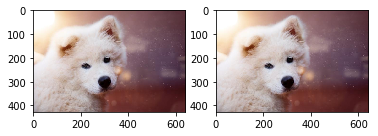

In [8]:
from __future__ import print_function
import matplotlib.pyplot as plt
img1 = pipe_out[0].at(0)
img2 = pipe_out[1].at(0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1);
ax[1].imshow(img2);